In [27]:
import pandas as pd
import numpy as np
import time

In [28]:
X_train_raw = pd.read_csv("csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv", header=None)
X_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = X_train_raw.to_numpy()
X_train = X_train.reshape(60000, 28, 28)
X_train.shape

(60000, 28, 28)

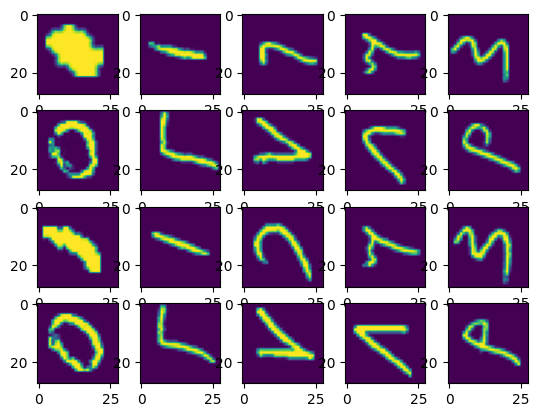

In [30]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
plt.show()

In [31]:
for i in range(X_train.shape[0]):
    X_train[i] = np.rot90(X_train[i], k=3)
    X_train[i] = np.flip(X_train[i], axis=1)

In [32]:
X_train[0].shape

(28, 28)

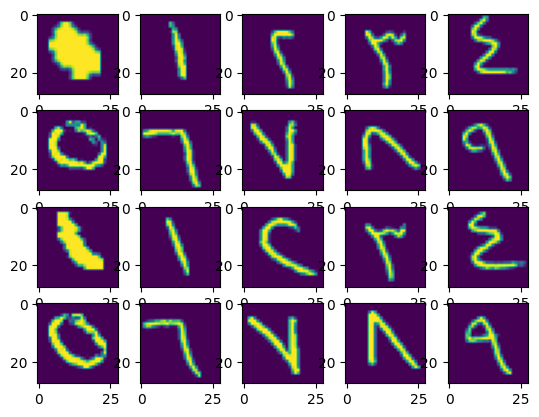

In [33]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
plt.show()

In [34]:
y_train_raw = pd.read_csv("csvTrainLabel 60k x 1.csv", header=None)
y_train_raw.head()


,0
0,0
1,1
2,2
3,3
4,4


In [35]:
y_train = np.ravel(y_train_raw.to_numpy())

In [36]:
combined_data = list(zip(X_train, y_train))
np.random.shuffle(combined_data)
X_train, y_train = zip(*combined_data)
X_train = np.array(X_train)
y_train = np.array(y_train)

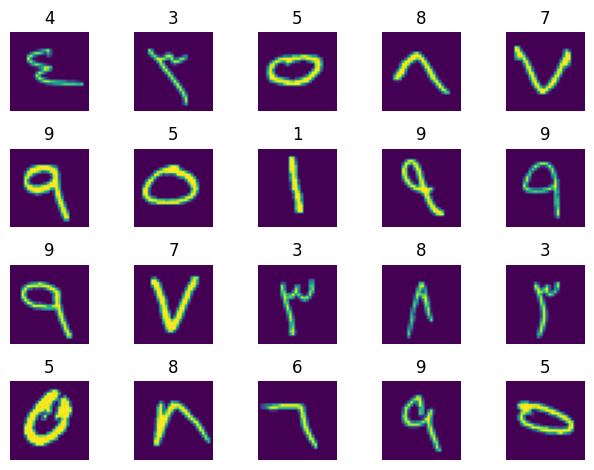

In [37]:
import matplotlib.pyplot as plt


for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])  
    plt.axis('off') 
    plt.title(str(y_train[i])) 

plt.tight_layout()

plt.show()


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [39]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)

In [40]:
X_train_flat.shape

(60000, 784)

In [41]:
model = DecisionTreeClassifier(max_depth=20)
start_train_time = time.time()
model.fit(X_train_flat, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

In [42]:
y_train_pred = model.predict(X_train_flat)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training time= {total_train_time}")
print(f"Train accuracy= {train_accuracy}")

Training time= 15.339112043380737
Train accuracy= 0.9977166666666667


In [43]:
X_test_raw = pd.read_csv("csvTestImages 10k x 784.csv", header=None).to_numpy()


In [44]:
X_test = X_test_raw.reshape(X_test_raw.shape[0], 28, 28)
for i in range(X_test.shape[0]):
    X_test[i] = np.rot90(X_test[i], k=3)
    X_test[i] = np.flip(X_test[i], axis=1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
y_test = np.ravel(pd.read_csv("csvTestLabel 10k x 1.csv", header=None).to_numpy())

In [47]:
start_pred_time = time.time()
y_pred = model.predict(X_test_flat)
end_pred_time = time.time()
total_pred_time = end_pred_time - start_pred_time
print(f"Total prediction time= {total_pred_time}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy= {test_accuracy}")

Total prediction time= 0.025981426239013672
Test accuracy= 0.9315


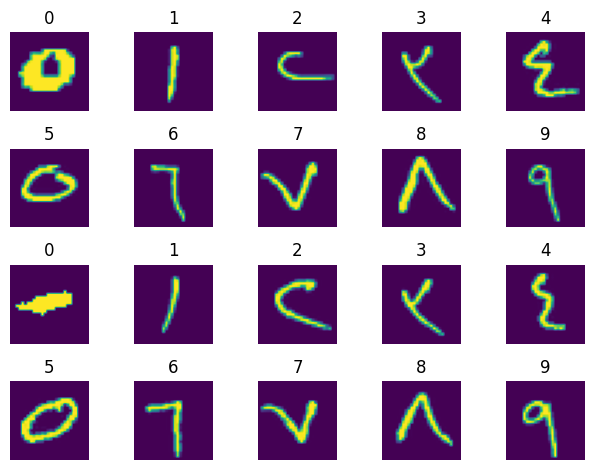

In [48]:
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])  
    plt.axis('off') 
    plt.title(str(y_pred[i])) 

plt.tight_layout()

plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
start_train_time = time.time()
rf_model.fit(X_train_flat, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

In [51]:
y_train_pred = rf_model.predict(X_train_flat)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training time= {total_train_time}")
print(f"Train accuracy= {train_accuracy}")

Training time= 39.23241138458252
Train accuracy= 0.9996


In [52]:
start_pred_time = time.time()
y_pred = rf_model.predict(X_test_flat)
end_pred_time = time.time()
total_pred_time = end_pred_time - start_pred_time
print(f"Total prediction time= {total_pred_time}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy= {test_accuracy}")

Total prediction time= 0.2860445976257324
Test accuracy= 0.9837
